▬▬ Resources/Papers ▬▬▬▬▬▬▬
- Colab Notebook: https://colab.research.google.com/dri...
- DDPM: https://arxiv.org/pdf/2006.11239.pdf
- DDPM Improved: https://arxiv.org/pdf/2105.05233.pdf
- Awesome Diffusion Models Github: https://github.com/heejkoo/Awesome-Di...
- Outlier Diffusion Model Video:   https://youtu.be/a4Yfz2FxXiY

 • Diffusion Models ...  
- Positional Embeddings: https://machinelearningmastery.com/a-...

# Forward diffusion process

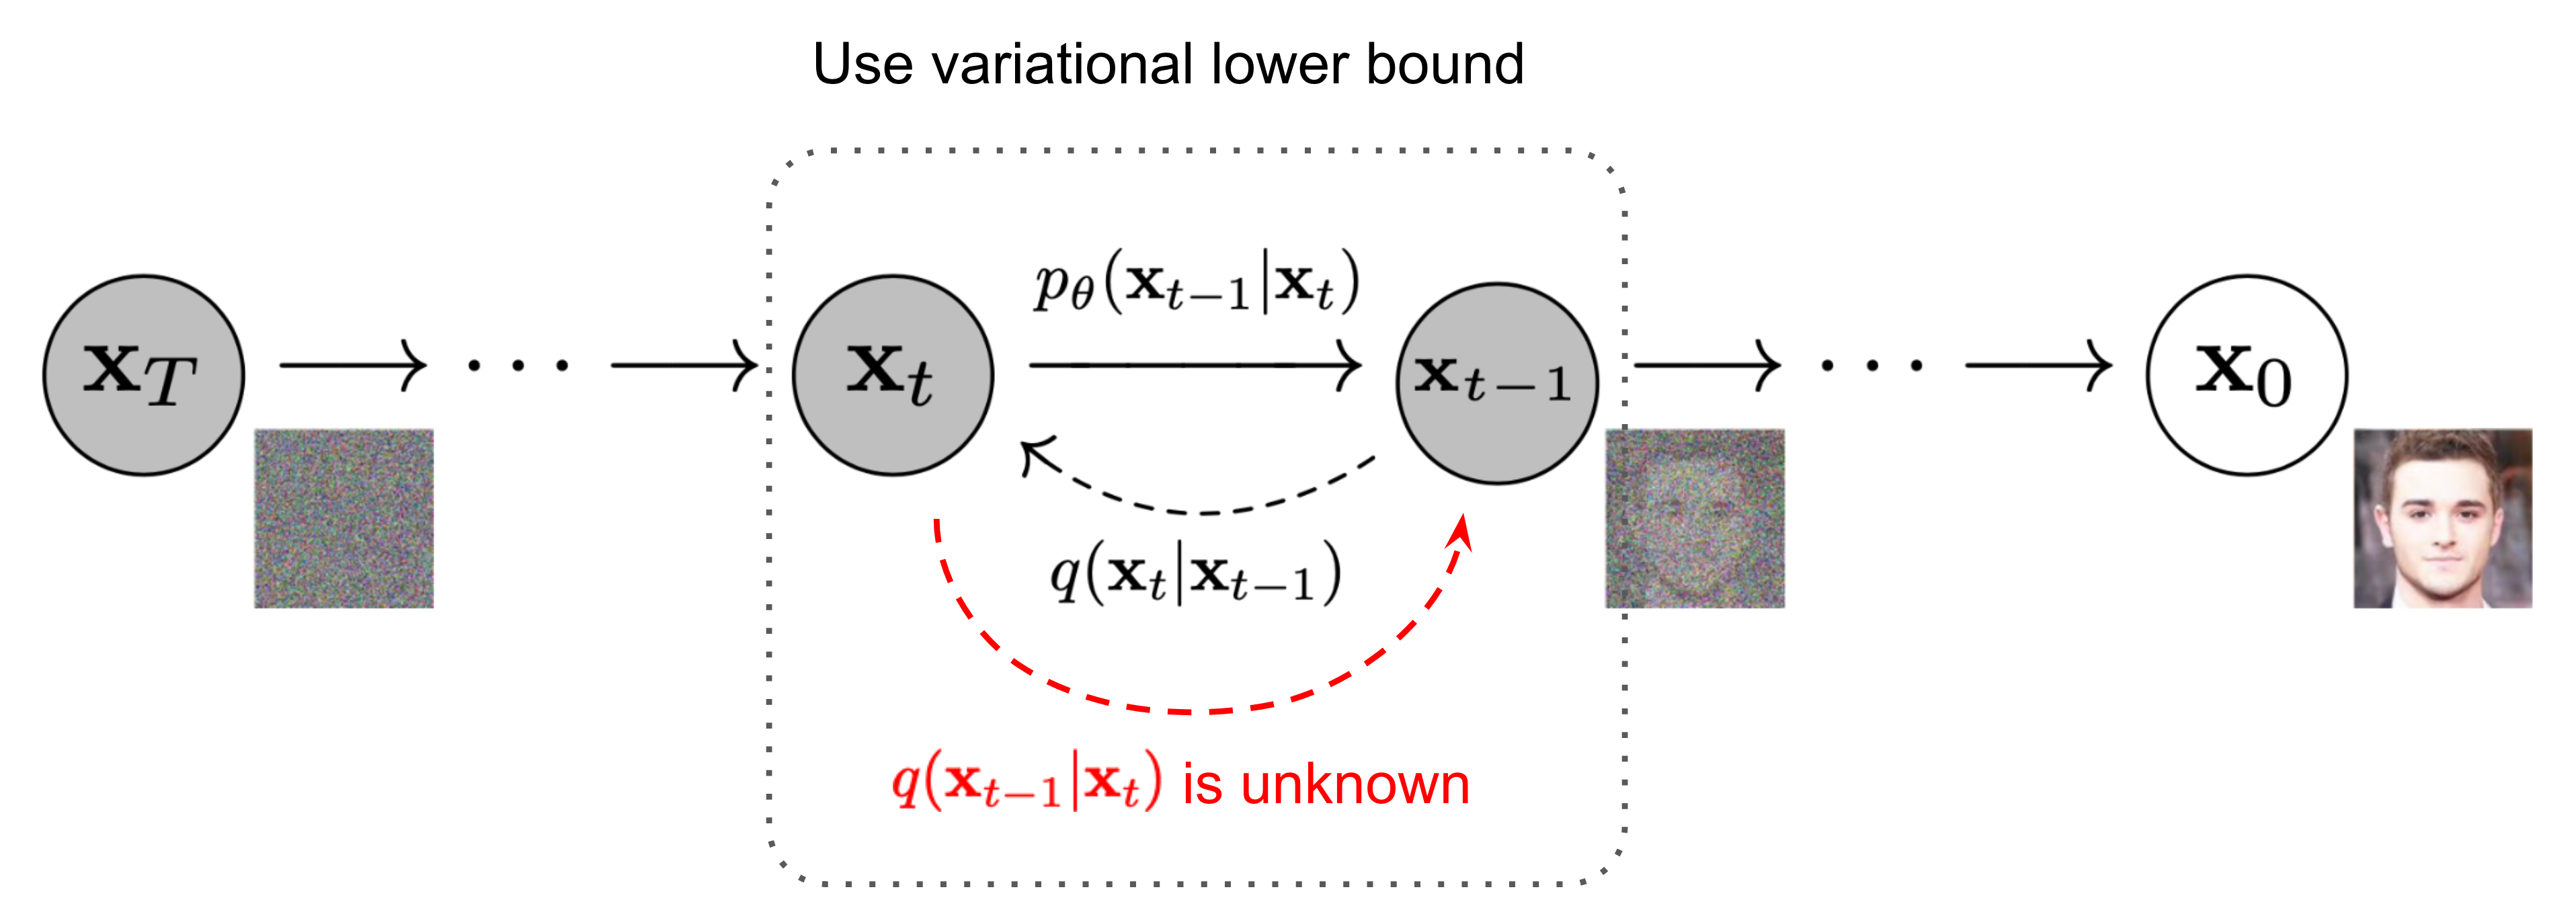

The Markov chain of forward (reverse) diffusion process of generating a sample by slowly adding (removing) noise. (Image source: Ho et al. 2020 with a few additional annotations)

$$ q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I}) \quad
q(\mathbf{x}_{1:T} \vert \mathbf{x}_0) = \prod^T_{t=1} q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) $$

- Closed form : $ \mathbf{x}_t = \sqrt{\bar\alpha_t} \mathbf{x}_0 + \sqrt{(1-\bar{a}_t)}\mathbf{\epsilon}$

mean = $  \sqrt{\bar\alpha_t} \mathbf{x}_0 $

variance = $\sqrt{(1-\bar{a}_t)}\mathbf{\epsilon} $

## forward diffusion process 에서 x_t 를 구하는 과정을 간단하게 살펴보자

In [1]:
import torch

In [2]:
x0 = torch.randn(2, 3, 32, 32) # images or data

In [3]:
betas = torch.tensor([0.05, 0.1, 0.15, 0.2, 0.25])

In [4]:
t = torch.tensor([1, 3])

betas : amounts of noise that are being applied at every timestep of the diffusion process

alpha(1 - betas ) : amount of original image's information that is being preserved after a diffusion process

In [7]:
alphas = 1 - betas
print(alphas)

tensor([0.9500, 0.9000, 0.8500, 0.8000, 0.7500])


In [9]:
alpha_hat = torch.cumprod(alphas, axis = 0)
print(alpha_hat)

tensor([0.9500, 0.8550, 0.7268, 0.5814, 0.4360])


In [25]:
one_minus_alpha_hat = alpha_hat.gather(-1, t).reshape(-1, 1, 1, 1)
print(one_minus_alpha_hat)

tensor([[[[0.8550]]],


        [[[0.5814]]]])


In [26]:
noise = torch.rand_like(x0)
mean = result.sqrt() * x0
variance = torch.sqrt(1 - one_minus_alpha_hat) * noise

In [27]:
x_t = mean + variance

In [28]:
x_t.size()

torch.Size([2, 3, 32, 32])

## 위 코드를 조금 더 자세히..

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_images(datset, num_samples=20, cols=4):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15)) 
    for i, img in enumerate(data):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols) + 1, cols, i + 1)
        plt.imshow(img[0])

data = torchvision.datasets.StanfordCars(root=".", download=True)
show_images(data)

HTTPError: HTTP Error 404: Not Found